<a href="https://colab.research.google.com/github/AlexeyTimoshin/Statistics/blob/main/Sample_Sum_Sample_Mean_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import normaltest

Напишем функции

In [34]:
def get_reject(pvalue):
    if pvalue > 0.01:
        print('При уровне значимости 0.01 Н0 не может быть отвергнута')
    else:
        print('При уровне значимости 0.01 Н0 отвергнута')


def get_shapiro(x):
    '''
    Тест Шапиро-Уилка на проверку распределения на нормальность.
    H0: выборка из нормального распределения (Статистика -> 1, pvalue > a)
    H1: выборка не из нормального распределения
   '''
    res = shapiro(x)
    print('Значение статистики Шапиро-Уилка:', res.statistic)
    print('P value:', res.pvalue)
    get_reject(res.pvalue)

def get_norm(x):
    '''
    Тест Агостино-Пирсона на проверку распределения на нормальность.
    Статистика имеет тенденцию к 0 при нормальности данных.
    Н0: данные из нормального распределения, pvalue > a.
    H1: данные не из нормального распределения, pvalue < a.
    '''
    res = normaltest(x)
    print('Значение статистики Агостино-Пирсона:', res.statistic)
    print('P value:', res.pvalue)
    get_reject(res.pvalue)

def bootstrap(data, sample_size=100):
    sum_data = []
    avg_data = []

    for i in range(1000):
        sample = np.random.choice(data, size=sample_size)
        sample_sum = sample.sum()
        sample_avg = sample.mean()

        sum_data.append(sample_sum)
        avg_data.append(sample_avg)

    return sum_data, avg_data

Центральная предельная теорема - сумма большого количества независимых  случайных величин, имеющих конечные мат.ожидания и примерно одинаковые   дисперсии распределена нормально.

Начнём с равномерного распределения  

<Axes: ylabel='Count'>

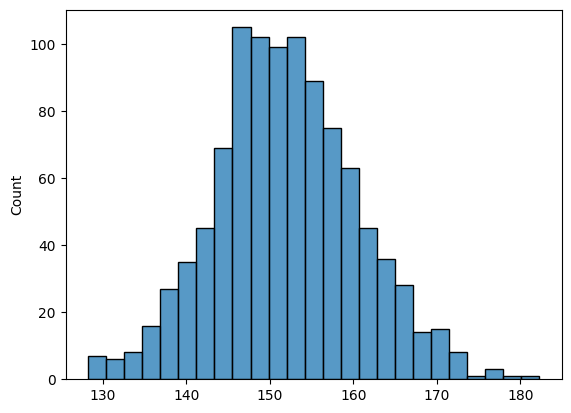

In [35]:
unif = np.random.uniform(0,3,1000)
sum_unif, avg_unif = bootstrap(unif)
sns.histplot(sum_unif)

In [36]:
get_shapiro(sum_unif)
print()
get_norm(sum_unif)

Значение статистики Шапиро-Уилка: 0.9975257941662616
P value: 0.13524138834374022
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Агостино-Пирсона: 4.027330548044888
P value: 0.1334984683792245
При уровне значимости 0.01 Н0 не может быть отвергнута


Сработало - сумма подвыборок из равномерного распределения получилась нормально  
распределенной.
Рассмотрим ещё одну форму ЦПТ.  
Пусть X, X1 ... Xn - н.о.с.в. с конечным мат. ожиданием - ***mu*** и дисперсией ***sigma_sq***.  
Сумма n таких величин равна ***Sn*** = X1+...+Xn  
(Sn - mu*n) / sqrt(sigma_sq) * n --> N(0,1) при n -> бесконечности.  

<Axes: ylabel='Count'>

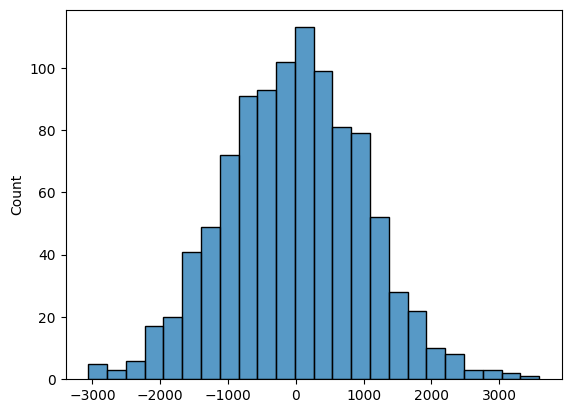

In [37]:
sum_u = []
samp_mean = unif.mean()
samp_std = unif.std()
n = len(unif)

for i in range(1000):
    sample = np.random.choice(unif, 1000)
    sample_sum = sample.sum()
    stat = (sample_sum - samp_mean*n) / samp_std*np.sqrt(n)
    sum_u.append(stat)

sns.histplot(sum_u)

In [39]:
get_shapiro(sum_u)
print()
get_norm(sum_u)

Значение статистики Шапиро-Уилка: 0.9986593166986633
P value: 0.661093459845964
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Агостино-Пирсона: 1.3885850953831955
P value: 0.49942764427546205
При уровне значимости 0.01 Н0 не может быть отвергнута


С 1 распределением работает, теперь попробуем с 3 равномерными, у которых  
разные, но конечные мат.ожидания и разные дисперсии.  

<Axes: ylabel='Count'>

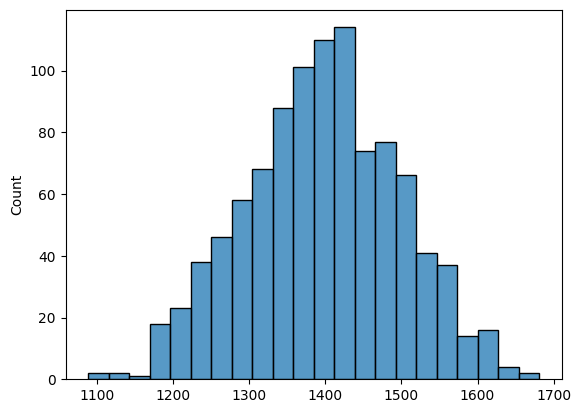

In [40]:
u_1 = np.random.uniform(20,30, 1000)
u_2 = np.random.uniform(0, 30, 1000)
u_3 = np.random.uniform(50,150, 1000)

sums_uniforms = []
# Как вариант будем брать по 10 значений из каждого распределения и складывать их.

for i in range(1000):
    sums_sample = sum(np.random.choice(u_1, 10) + np.random.choice(u_2, 10) + np.random.choice(u_3, 10))
    sums_uniforms.append(sums_sample)

sns.histplot(sums_uniforms)

In [41]:
get_shapiro(sums_uniforms)
print()
get_norm(sums_uniforms)

Значение статистики Шапиро-Уилка: 0.9978127314039222
P value: 0.21281453621183527
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Агостино-Пирсона: 5.6375829222674865
P value: 0.05967802235411624
При уровне значимости 0.01 Н0 не может быть отвергнута


It's alive!  
Она работает.

<Axes: ylabel='Count'>

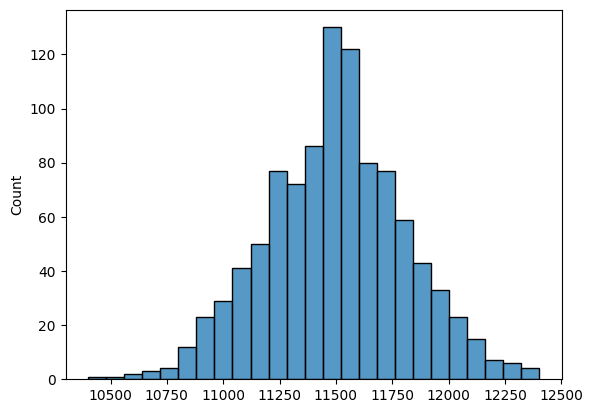

In [42]:
# Попробуем 2 распределения и возьмём выборку больше

sums_uniform2 = []

for i in range(1000):
    sums_sample = sum(np.random.choice(u_2, 100) + np.random.choice(u_3, 100))
    sums_uniform2.append(sums_sample)

sns.histplot(sums_uniform2)

In [43]:
get_shapiro(sums_uniform2)
print()
get_norm(sums_uniform2)

Значение статистики Шапиро-Уилка: 0.9983242469540147
P value: 0.4455161192279186
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Агостино-Пирсона: 0.6154764863234778
P value: 0.7351077122982623
При уровне значимости 0.01 Н0 не может быть отвергнута


Перейдём биноминальному распределению.  

<Axes: ylabel='Count'>

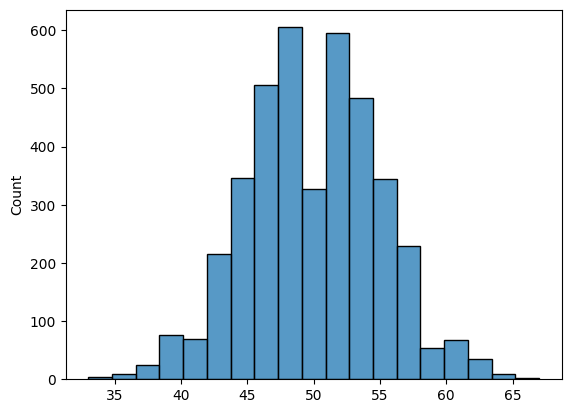

In [46]:
binom = np.random.binomial(100, 0.5, 4000)
sns.histplot(binom, bins=19)

In [47]:
get_shapiro(binom)
print()
get_norm(binom)

Значение статистики Шапиро-Уилка: 0.9964153820740738
P value: 3.269427331237036e-08
При уровне значимости 0.01 Н0 отвергнута

Значение статистики Агостино-Пирсона: 1.2192861593030035
P value: 0.5435448366694784
При уровне значимости 0.01 Н0 не может быть отвергнута


Результат интересный - тест Шапиро не пройдет, а тест Агостино - да.

Не смотря на [ЦПТ Муавра - Лапласа](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%BA%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%9C%D1%83%D0%B0%D0%B2%D1%80%D0%B0_%E2%80%94_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0) Шапиро-Уилк не хочет признавать здесь  
нормальное распределение и упорно отвергает H0 о том что оно есть.  
Как вариант я где то не прав.  

Посмотрим что с экспоненциальным расеределением.  

<Axes: ylabel='Count'>

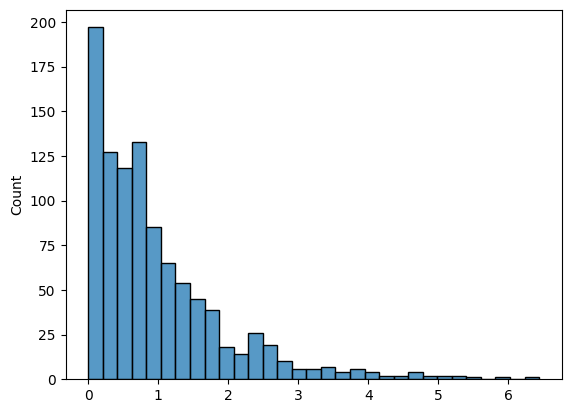

In [48]:
exponent = np.random.exponential(1, 1000)

sns.histplot(exponent)

<Axes: ylabel='Count'>

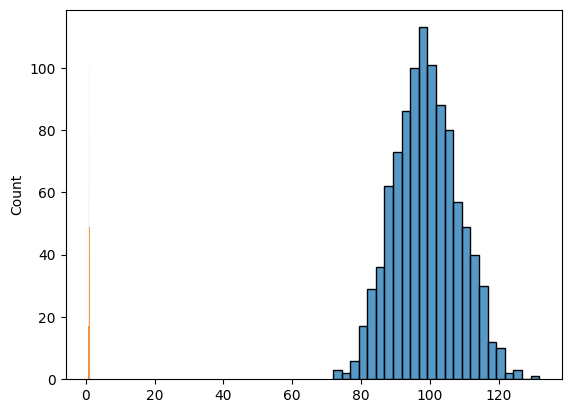

In [51]:
sum_exp, avg_exp = bootstrap(exponent)

sns.histplot(sum_exp)
sns.histplot(avg_exp)

In [52]:
get_shapiro(sum_exp)
get_norm(sum_exp)
print('---------------------------------------------------------')
get_shapiro(avg_exp)
get_norm(avg_exp)

Значение статистики Шапиро-Уилка: 0.997971151038319
P value: 0.27076395012355736
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 3.819207525956283
P value: 0.14813907315296823
При уровне значимости 0.01 Н0 не может быть отвергнута
---------------------------------------------------------
Значение статистики Шапиро-Уилка: 0.9979711510383198
P value: 0.27076395012384646
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 3.819207525956379
P value: 0.14813907315296115
При уровне значимости 0.01 Н0 не может быть отвергнута


Экспоненциальное распределение проверку прошло.

А не попробовать ли нам распределение Пуасонна?  

<Axes: ylabel='Count'>

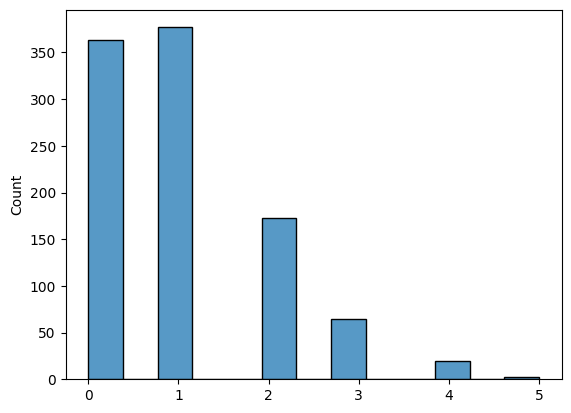

In [53]:
poison = np.random.poisson(1, 1000)
sns.histplot(poison)

<Axes: ylabel='Count'>

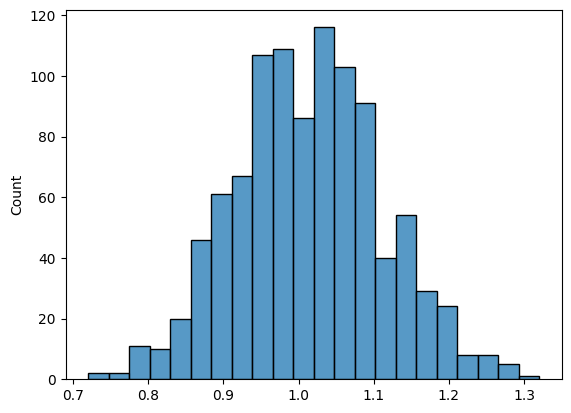

In [54]:
poison_sum, poison_avg = bootstrap(poison)

sns.histplot(poison_avg)

In [55]:
get_shapiro(poison_sum)
get_norm(poison_sum)
print('-------------------------------')
get_shapiro(poison_avg)
get_norm(poison_avg)

Значение статистики Шапиро-Уилка: 0.9974864010708038
P value: 0.1269205657941111
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 2.86452634778162
P value: 0.23876793694190837
При уровне значимости 0.01 Н0 не может быть отвергнута
-------------------------------
Значение статистики Шапиро-Уилка: 0.9974864010708028
P value: 0.12692056579389915
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 2.8645263477815996
P value: 0.2387679369419108
При уровне значимости 0.01 Н0 не может быть отвергнута


И выборочная сумма, и выборочное среднее прошли тесты.  

Едем дальше. Хи квадрат.

<Axes: ylabel='Count'>

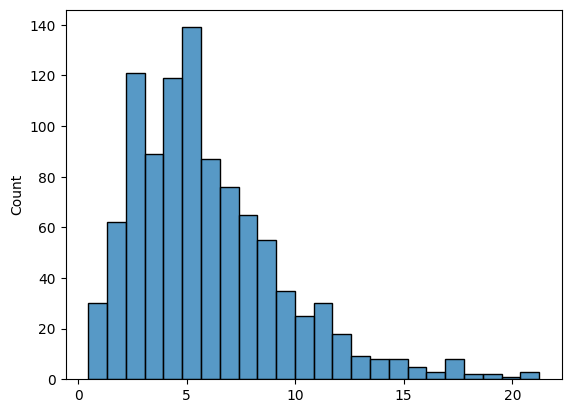

In [60]:
chi = np.random.chisquare(6, 1000)
sns.histplot(chi)

<Axes: ylabel='Count'>

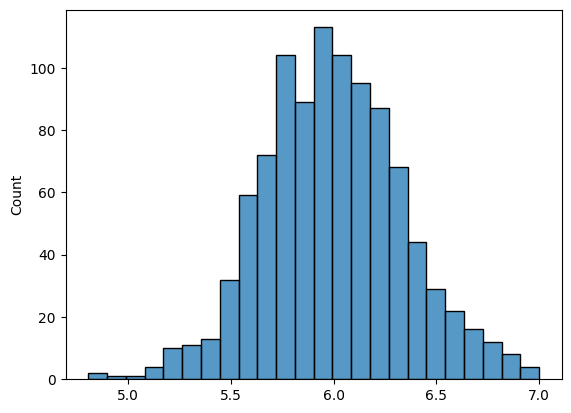

In [61]:
chi_sum, chi_avg = bootstrap(chi)
sns.histplot(chi_avg)

In [62]:
get_shapiro(chi_sum)
print()
get_norm(chi_sum)
print('------------------------------')
get_shapiro(chi_avg)
print()
get_norm(chi_avg)

Значение статистики Шапиро-Уилка: 0.9973733828975216
P value: 0.10565251446263035
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Агостино-Пирсона: 1.9457337712676868
P value: 0.37799780674781375
При уровне значимости 0.01 Н0 не может быть отвергнута
------------------------------
Значение статистики Шапиро-Уилка: 0.9973733828975212
P value: 0.10565251446256813
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Агостино-Пирсона: 1.945733771267598
P value: 0.3779978067478306
При уровне значимости 0.01 Н0 не может быть отвергнута


Хи квадрат прошёл.  

Парето.  

<Axes: ylabel='Count'>

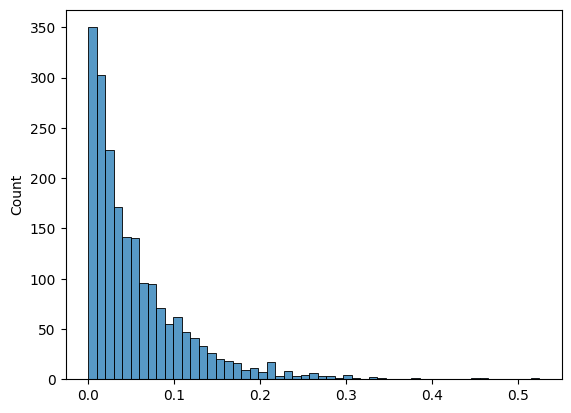

In [72]:
pareto = np.random.pareto(20, 2000)
sns.histplot(pareto)

In [73]:
sum_pareto, avg_pareto = bootstrap(pareto)
get_shapiro(sum_pareto)
get_norm(sum_pareto)
print('--------------------------------------')
get_shapiro(avg_pareto)
get_norm(avg_pareto)

Значение статистики Шапиро-Уилка: 0.998038796803567
P value: 0.2992608176260685
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 2.7281373798800317
P value: 0.25561862536587704
При уровне значимости 0.01 Н0 не может быть отвергнута
--------------------------------------
Значение статистики Шапиро-Уилка: 0.998038796803567
P value: 0.2992608176260685
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 2.728137379879977
P value: 0.255618625365884
При уровне значимости 0.01 Н0 не может быть отвергнута


<Axes: ylabel='Count'>

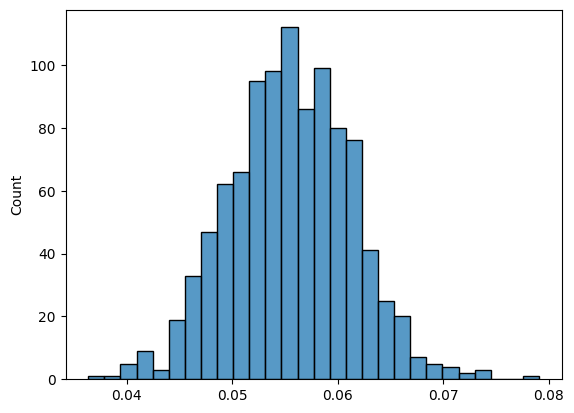

In [74]:
sns.histplot(avg_pareto)

Стьюдент

<Axes: ylabel='Count'>

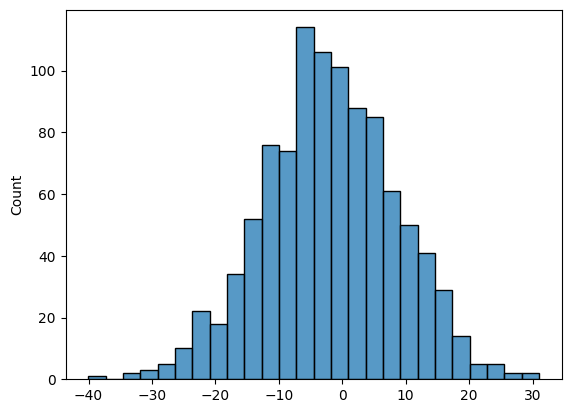

In [75]:
student = np.random.standard_t(20, 2000)
stud_sum, stud_avg = bootstrap(student)

sns.histplot(stud_sum)

In [76]:
get_shapiro(stud_sum)
get_norm(stud_sum)
print()
get_shapiro(stud_avg)
get_norm(stud_avg)

Значение статистики Шапиро-Уилка: 0.9990320385115723
P value: 0.889169559219801
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 0.5604306630880944
P value: 0.7556210148964213
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Шапиро-Уилка: 0.9990320385115719
P value: 0.8891695592196165
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 0.5604306630880991
P value: 0.7556210148964196
При уровне значимости 0.01 Н0 не может быть отвергнута


Сгенерируем какое нибудь расределение и посмотрим что там  

In [77]:
exp = np.random.exponential(1, 2000)
uniform = np.random.uniform(3,10, 2000)
stand = np.random.normal(10, 2, 2000)

strange_dist = np.concatenate([exp, uniform, stand])

<Axes: ylabel='Count'>

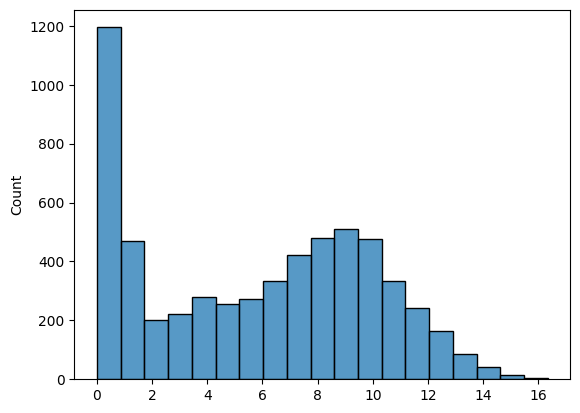

In [78]:
sns.histplot(strange_dist)

<Axes: ylabel='Count'>

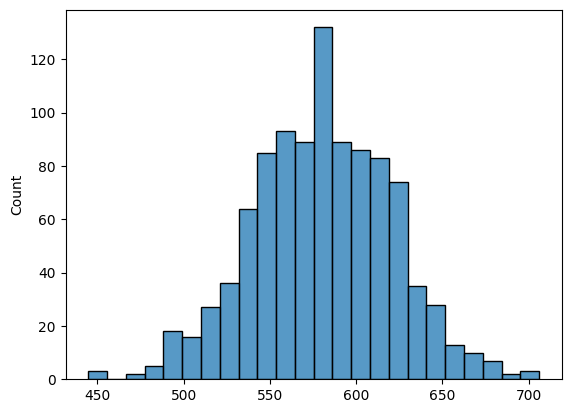

In [79]:
strange_sum, strange_avg = bootstrap(strange_dist)

sns.histplot(strange_sum)

In [80]:
get_shapiro(strange_sum)
get_norm(strange_sum)
print()
get_shapiro(strange_avg)
get_norm(strange_avg)

Значение статистики Шапиро-Уилка: 0.9987513274060054
P value: 0.7229134582231393
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 0.5584794721081712
P value: 0.7563585550626061
При уровне значимости 0.01 Н0 не может быть отвергнута

Значение статистики Шапиро-Уилка: 0.9987513274060057
P value: 0.7229134582233816
При уровне значимости 0.01 Н0 не может быть отвергнута
Значение статистики Агостино-Пирсона: 0.5584794721083263
P value: 0.7563585550625475
При уровне значимости 0.01 Н0 не может быть отвергнута
